In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import add_dummy_feature
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
np.random.seed(42)
n = 100 # number of instances
X = 2 * np.random.rand(n, 1) # column vector

# we will define slope and intercept
slope = 3
intercept = 4
y = intercept + slope * X + np.random.randn(n, 1) # column vector
# np.random.randn(n, 1) adds noise to the data
# The noise is added to simulate real-world imperfections in data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [36]:
def regression_report(y_true, y_pred):
    errors = y_true - y_pred
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors**2)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [4]:
class LinearRegressionMeanCentered:
    '''
    Mean-centered approach
    b = mean(y) - m * mean(x)
    m (Slope) = summ((yi - mean(y)) * (xi - mean(x))) / summ(xi - mean(x))
    '''
    def __init__(self):
        pass
    def calc_X_mean(self):
        self.X_mean = np.mean(self.X)
    def calc_y_mean(self):
        self.y_mean = np.mean(self.y)
    def calc_m(self):
        num = np.sum([(Xi - self.X_mean)*(yi - self.y_mean) for Xi, yi in zip(self.X, self.y)])
        deno = np.sum([(Xi - self.X_mean)**2 for Xi in self.X])
        self.m = num / deno
    def calc_b(self):
        self.b = self.y_mean - (self.m * self.X_mean)
    def fit(self, X, y):
        if len(X) != len(y): raise ValueError("X and y must be the same length")
        self.X = X
        self.y = y
        self.n = len(X)
        self.calc_X_mean()
        self.calc_y_mean()
        self.calc_m()
        self.calc_b()

    def predict(self, X_test):
        return [(self.m * x + self.b) for x in X_test]

In [9]:
lr_mean_model = LinearRegressionMeanCentered()
lr_mean_model.fit(X_train, y_train)

In [24]:
y_pred1 = lr_mean_model.predict(X_test)

In [25]:
# we find the intercept(b) and the slope(m) calculated by LinearRegressionMeanCentered() is a little off than the intercept(=4) and slope(=3) we had defined above
# this is due to the noise in the data we added using np.random.randn(n, 1)
# if we were to remove the noise, these numbers (of intercept and slope calculted by our class) would match the numbers above (what we defined/assigned)
lr_mean_model.b, lr_mean_model.m

(4.142913319458568, 2.799323657480275)

In [37]:
regression_report(y_test, y_pred1)

{'MAE': 0.5913425779189774,
 'MSE': 0.6536995137170021,
 'RMSE': 0.8085168605026132,
 'R2': 0.8072059636181392}

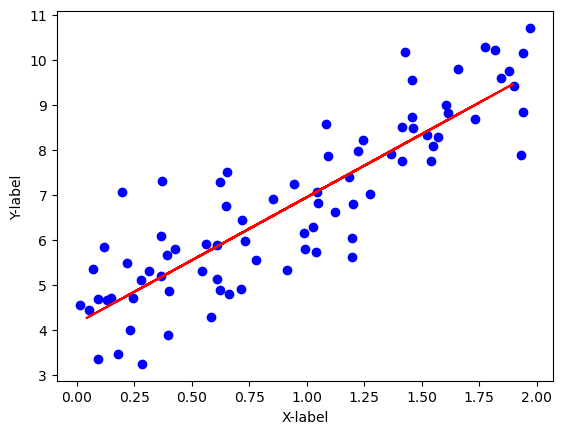

In [26]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_test, y_pred1, color="red")
plt.xlabel("X-label")
plt.ylabel("Y-label")
plt.show()

In [18]:
class LinearRegressionNormalForm:
    '''
    This follow the normal equation approach
    The equation for predicted y value (,here) is:
    pred_y = X*θ
    where θ -> parameter vector (weights and intercept)
        θ0 is the intercept
        θ1, θ2, θ3...θn are the weights
    '''
    def __init__(self):
        pass
    def fit(self, X, y):
        # we add a column containing 1s at the start of X
        # So when we find the dot product of X and θ:
        #     θ0 gets multiplies to 1 and we get the intercept as it is (correct)
        #     the others, θ1, θ2, θ3..., are the weights and get multiplied with the values in X
        X = add_dummy_feature(X)
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
    def predict(self, X):
        X = add_dummy_feature(X)
        return X @ self.theta

In [20]:
lr_normal_form = LinearRegressionNormalForm()
lr_normal_form.fit(X_train, y_train)

In [27]:
y_pred2 = lr_normal_form.predict(X_test)

In [28]:
# when we have a look at theta(θ), we observe that the first value is the intercept and the rest of the values (1, in our case as we had a sinlge input feature) are weights
# as we had a single input feature, there is just one value apart from the intercept
# this is the slope value
lr_normal_form.theta

array([[4.14291332],
       [2.79932366]])

In [38]:
regression_report(y_test, y_pred2)

{'MAE': 0.5913425779189769,
 'MSE': 0.6536995137170015,
 'RMSE': 0.8085168605026128,
 'R2': 0.8072059636181393}

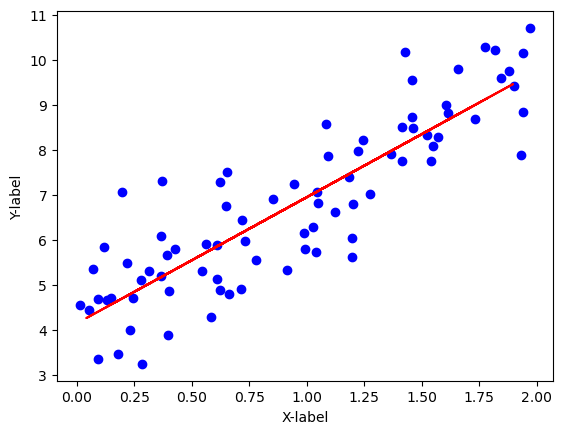

In [30]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_test, y_pred2, color="red")
plt.xlabel("X-label")
plt.ylabel("Y-label")
plt.show()